<a href="https://colab.research.google.com/github/Srinivasan2812/Plant-leaf-detection/blob/main/Plant_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is designed to run in Google Colab. It requires a dataset stored in Google Drive.

1.Dataset: Ensure you have the Plant-leaf-disease detection.zip file in your Drive root or update the zip_path variable.

2.Permissions: When running the first cell, follow the URL to authorize Google Drive access.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 1322 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Epoch 1/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 280s 7s/step - accuracy: 0.4135 - loss: 1.6617 - val_accuracy: 0.6067 - val_loss: 0.8343
Epoch 2/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 256s 6s/step - accuracy: 0.7533 - loss: 0.5449 - val_accuracy: 0.8000 - val_loss: 0.5351
Epoch 3/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 267s 6s/step - accuracy: 0.8697 - loss: 0.3601 - val_accuracy: 0.8733 - val_loss: 0.3549
Epoch 4/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 252s 6s/step - accuracy: 0.9321 - loss: 0.2233 - val_accuracy: 0.9067 - val_loss: 0.3043
Epoch 5/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 260s 6s/step - accuracy: 0.9133 - loss: 0.2508 - val_accuracy: 0.9000 - val_loss: 0.3165

Upload images to predict disease:


Saving leaf2.jpg to leaf2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


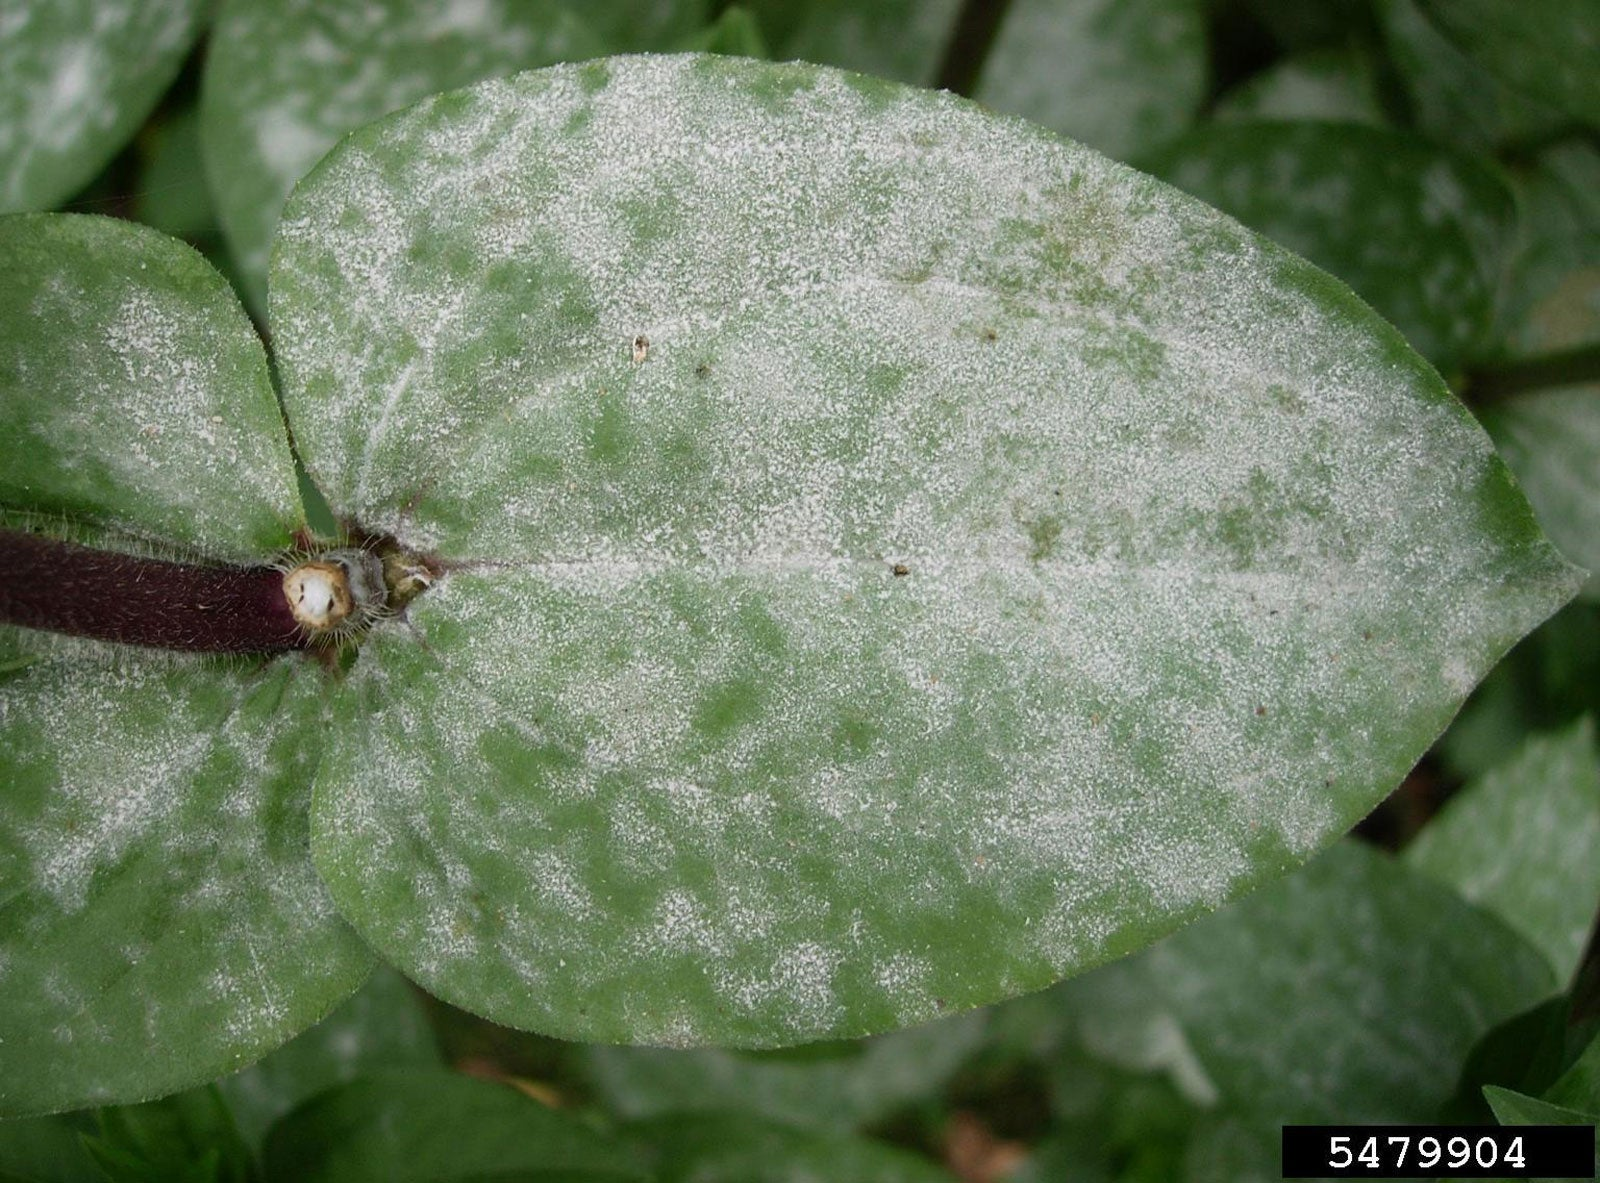

--- Result for leaf2.jpg ---
Predicted Disease: Powdery (99.99% confidence)


In [ ]:
import os
import IPython.display as display
from PIL import Image
import zipfile
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Mount and Extract
drive.mount('/content/drive')
zip_path = "/content/drive/MyDrive/Plant-leaf-disease detection.zip"
extraction_dir = "/content/plant_dataset"

# check if the path exists and extract the zip file to the colab environment
if not os.path.exists(extraction_dir):
    if os.path.exists(zip_path):
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extraction_dir)
    else:
        print("⚠️ Dataset not found! Please upload the zip to your Drive or local Colab session.")

root_dir = extraction_dir

#Data Generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(root_dir,'Plant-leaf-disease detection/Dataset/Train'),
    target_size=(225, 225),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    os.path.join(root_dir,'Plant-leaf-disease detection/Dataset/Test'),
    target_size=(225, 225),
    batch_size=32,
    class_mode='categorical'
)

#Model Architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(225, 225, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)

# 5. Preprocessing Function
def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x



# Map numeric indices back to disease names
labels = {v: k for k, v in train_generator.class_indices.items()}

from google.colab import files
print("\nUpload images to predict disease:")
uploaded = files.upload() # This opens the file picker

for filename in uploaded.keys():
    # Process the uploaded file
    img_data = preprocess_image(filename)

    # Make prediction
    predictions = model.predict(img_data)
    predicted_class_idx = np.argmax(predictions[0])

    # Get human-readable label
    result_label = labels[predicted_class_idx]
    confidence = predictions[0][predicted_class_idx] * 100
    display.display(display.Image(filename, width=300))

    print(f"--- Result for {filename} ---")
    print(f"Predicted Disease: {result_label} ({confidence:.2f}% confidence)")


